XEM THÔNG TIN CỦA THƯ MỤC SAU KHI ĐÃ XỬ LÝ

Số lượng ảnh:  3007
Số lượng thư mục con:  135
Số lượng thư mục rỗng:  0
Số lượng ảnh tối đa:  41
Số lượng ảnh tối thiểu:  15
Số lượng ảnh trung bình:  22


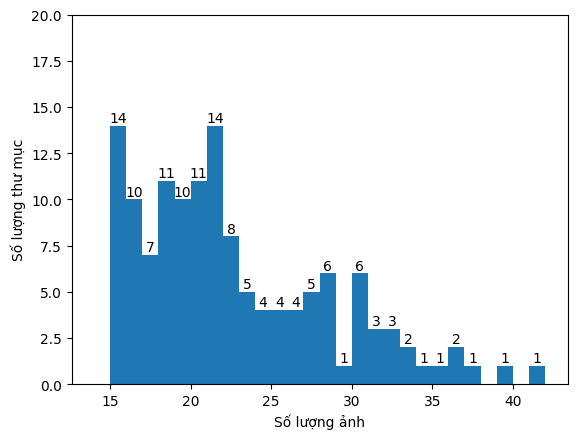

In [16]:
# Xem số lượng ảnh và phân bố trong bộ dữ liệu

import os
import matplotlib.pyplot as plt
import numpy as np

# Thư mục chứa các thư mục ảnh
image_dir = "../data/images"

# Đếm số lượng ảnh và thư mục con
num_images = 0
num_folders = 0
empty_folders = 0
image_counts = []
for folder in os.listdir(image_dir):
    if os.path.isdir(os.path.join(image_dir, folder)):
        folder_images = len(os.listdir(os.path.join(image_dir, folder)))
        if folder_images > 0:
            num_folders += 1
        else:
            empty_folders += 1
        image_counts.append(folder_images)
        num_images += folder_images

print("Số lượng ảnh: ", num_images)
print("Số lượng thư mục con: ", num_folders)
print("Số lượng thư mục rỗng: ", empty_folders)

# Lọc các thư mục không chứa ảnh
non_empty_counts = [count for count in image_counts if count > 0]

max_images = max(non_empty_counts)
min_images = min(non_empty_counts)
avg_images = np.mean(non_empty_counts)

print("Số lượng ảnh tối đa: ", max_images)
print("Số lượng ảnh tối thiểu: ", min_images)
print("Số lượng ảnh trung bình: ", round(avg_images))

# Tạo biểu đồ phân bố số lượng ảnh của các thư mục ảnh
bins = range(14, 43, 1)
plt.hist(image_counts, bins=bins)
# plt.title("Phân bố số lượng ảnh")
plt.xlabel("Số lượng ảnh")
plt.ylabel("Số lượng thư mục")
plt.ylim([0, 20])

# Ghi số lượng lên đầu mỗi bin
for i in range(len(bins) - 1):
    bin_count = np.sum((np.array(image_counts) >= bins[i]) & (np.array(image_counts) < bins[i + 1]))
    if bin_count > 0:
        plt.text(bins[i] + 0.5, bin_count + 0.2, str(bin_count), ha='center')

plt.show()

XEM CÁC ĐỊNH DẠNG CỦA ẢNH TRONG BỘ DỮ LIỆU

In [14]:
# Xem các định dạng của ảnh trong bộ dữ liệu

from PIL import Image
import os

# Thư mục chứa ảnh
image_dir = "../data/images"

# Khởi tạo từ điển lưu trữ số lượng ảnh của mỗi định dạng ảnh
image_counts = {}

# Lấy danh sách các định dạng ảnh
formats = set()
for root, dirs, files in os.walk(image_dir):
    for file in files:
        img_path = os.path.join(root, file)
        with Image.open(img_path) as img:
            fmt = img.format
            if fmt in image_counts:
                image_counts[fmt] += 1
            else:
                image_counts[fmt] = 1

# In ra số lượng ảnh của mỗi định dạng ảnh
print("Số lượng ảnh của mỗi định dạng ảnh:")
for fmt, count in image_counts.items():
    print(fmt, count)


Số lượng ảnh của mỗi định dạng ảnh:
JPEG 2808
PNG 199


XEM PHÂN BỐ KÍCH THƯỚC ẢNH

Chiều rộng: Min=92, Max=8256, Mean=689
Chiều cao: Min=120, Max=6844, Mean=655


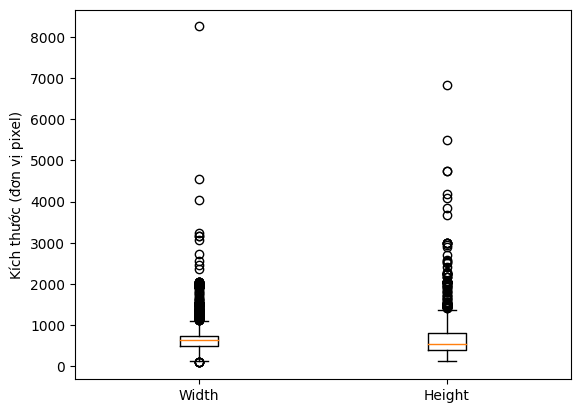

In [17]:
# Xem kích thước của ảnh trong bộ dữ liệu

import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Thư mục chứa ảnh
image_dir = "../data/images"

# Tính toán kích thước của tất cả các ảnh
image_sizes = []
for folder in os.listdir(image_dir):
    if os.path.isdir(os.path.join(image_dir, folder)):
        folder_images = os.listdir(os.path.join(image_dir, folder))
        for image_name in folder_images:
            image_path = os.path.join(image_dir, folder, image_name)
            with Image.open(image_path) as img:
                image_sizes.append(img.size)

# Tách các chiều rộng và chiều cao của ảnh thành 2 list riêng
widths, heights = zip(*image_sizes)

# Tính toán min, max, trung bình cho chiều rộng và chiều cao
min_width = np.min(widths)
max_width = np.max(widths)
mean_width = np.mean(widths)
min_height = np.min(heights)
max_height = np.max(heights)
mean_height = np.mean(heights)

# In kết quả
print("Chiều rộng: Min={}, Max={}, Mean={}".format(min_width, max_width, round(mean_width)))
print("Chiều cao: Min={}, Max={}, Mean={}".format(min_height, max_height, round(mean_height)))

# Vẽ box plot cho chiều rộng và chiều cao của ảnh
# plt.boxplot([widths, heights], labels=['Width', 'Height'], showfliers=False)
plt.boxplot([widths, heights], labels=['Width', 'Height'])
# plt.title("Phân bố kích thước của các ảnh")
plt.ylabel("Kích thước (đơn vị pixel)")
plt.show()
